<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/Detecting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Detecting Heart Disease from patients data

This dataset includes clinical features used to predict heart disease. Each record corresponds to a patient and includes the following attributes:

1) age: Represents the age of the patient in years. It is a numeric value.

2) sex: Indicates the gender of the patient. A value of 0 represents female, and 1 represents male.

3) chest pain type: Categorical variable that describes the type of chest pain experienced by the patient. It can take the following values:
1 = Typical angina
2 = Atypical angina
3 = Non-anginal pain
4 = Asymptomatic

4) resting blood pressure: The patient’s resting blood pressure measured in mm Hg. This is a numeric feature.

5) serum cholesterol: The cholesterol level in the blood, measured in mg/dL. It is a numeric variable.

6) fasting blood sugar: A binary variable indicating whether the patient’s fasting blood sugar is greater than 120 mg/dL.
1 = Yes (sugar > 120 mg/dL)
0 = No (sugar ≤ 120 mg/dL)

7) resting electrocardiogram results: Categorical variable describing the result of the patient’s
resting ECG. It can take the values:
0 = Normal
1 = ST-T wave abnormality (e.g., T wave inversions or ST elevation/depression > 0.05 mV)
2 = Left Ventricular Hypertrophy (based on Estes’ criteria)

8) maximum heart rate achieved: The highest heart rate achieved by the patient during exercise, typically ranging from 71 to 202 bpm. It is a numeric value.

9) exercise induced angina: A binary variable indicating whether the patient experienced angina during exercise.
1 = Yes
0 = No

10) oldpeak: Represents the amount of ST depression induced by exercise compared to rest. It is a numeric value.

11) the slope of the peak exercise ST segment: A categorical feature that describes the slope of the ST segment during peak exercise.
1 = Upsloping
2 = Flat
3 = Downsloping

12) class: The target variable indicating the presence or absence of heart disease.
0 = Normal (no heart disease)
1 = Heart Disease (presence of disease)

###Importing libraries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/heart_disease_data.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**The data is having all non-null values**

In [5]:
df.shape

(1190, 12)

In [8]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


###EDA

<Axes: >

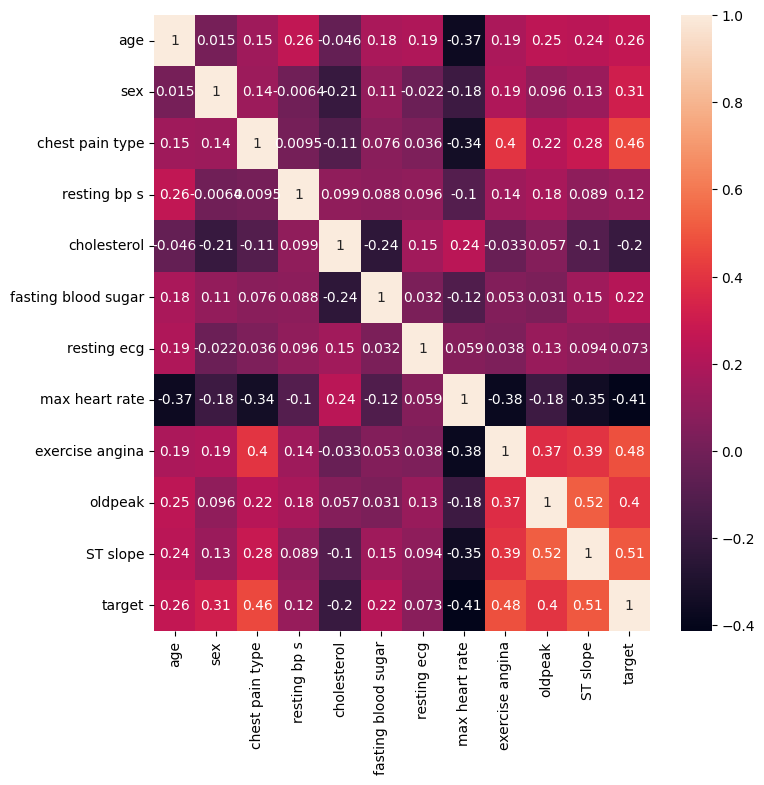

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='sex', ylabel='count'>

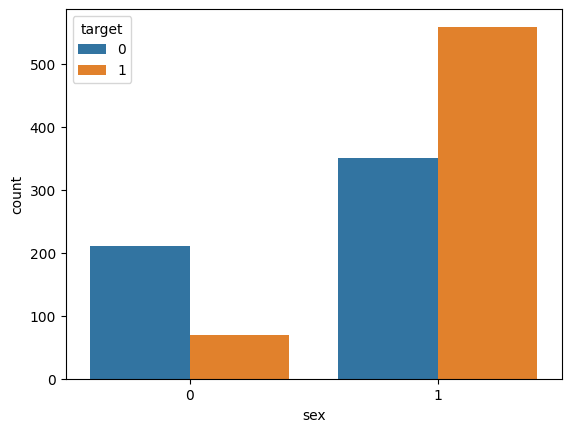

In [15]:
sns.countplot(data=df,x='sex',hue='target')

**Males(1) having more number of heart disease(1) than female(0)**

<Axes: xlabel='age', ylabel='Count'>

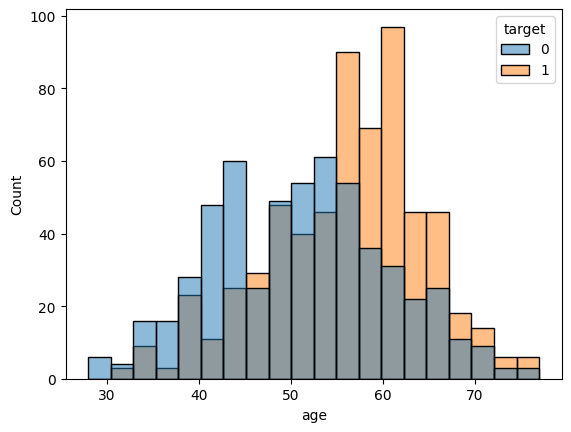

In [22]:
sns.histplot(data=df,x='age',bins=20,color='grey',hue='target')

**People with old age(55-100) having high chance of heart disease**

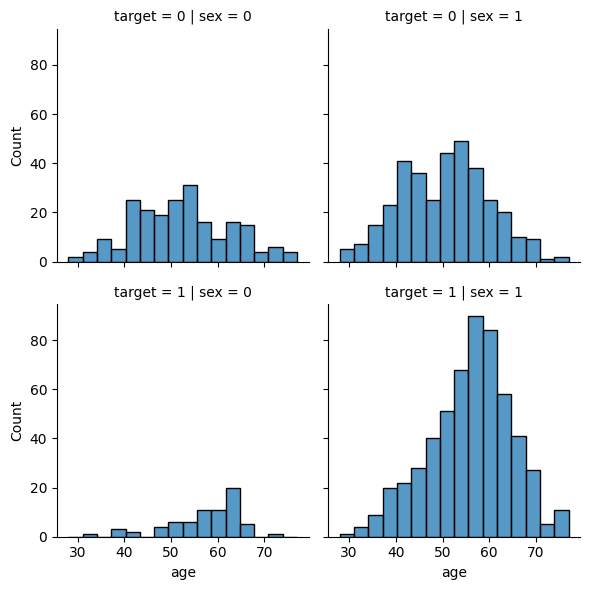

In [24]:
sns.displot(
    df, x="age", col="sex", row="target",
    binwidth=3, height=3)

In [16]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Males with old age having a chance of heart disease**

<Axes: xlabel='target', ylabel='max heart rate'>

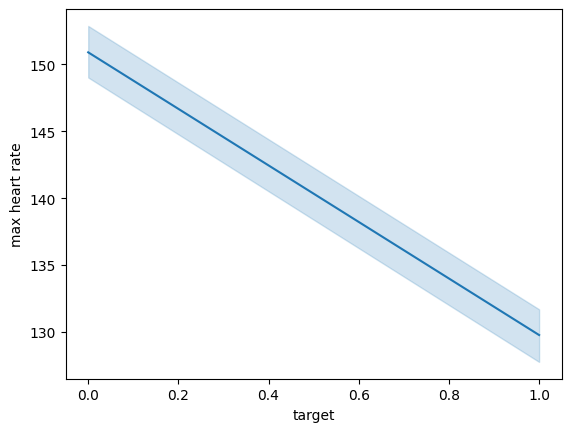

In [28]:
sns.lineplot(data=df,y='max heart rate',x='target')

**Max heart rate and heart disease are inversly proportional to each other,means people with low heart rate have a high chance of heart disease**

/tmp/ipython-input-31-4129118716.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(data=df,x='chest pain type',hue='target',color='pink')


<Axes: xlabel='chest pain type', ylabel='count'>

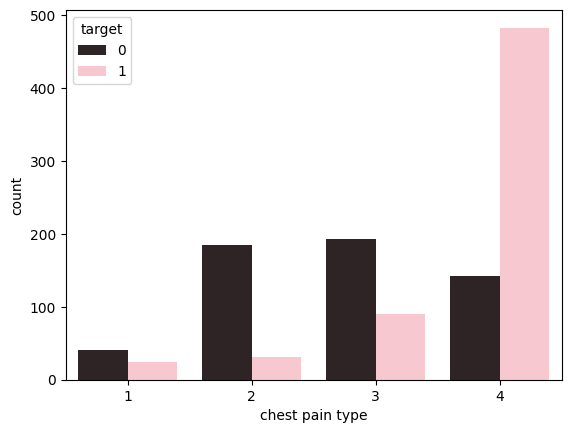

In [31]:
sns.countplot(data=df,x='chest pain type',hue='target',color='pink')

**Chest pain type is at stage 4 which is 'asymptomatic' is a great cause for heart disease**

/tmp/ipython-input-33-2556207748.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df,x='ST slope',hue='target',color='red')


<Axes: xlabel='ST slope', ylabel='count'>

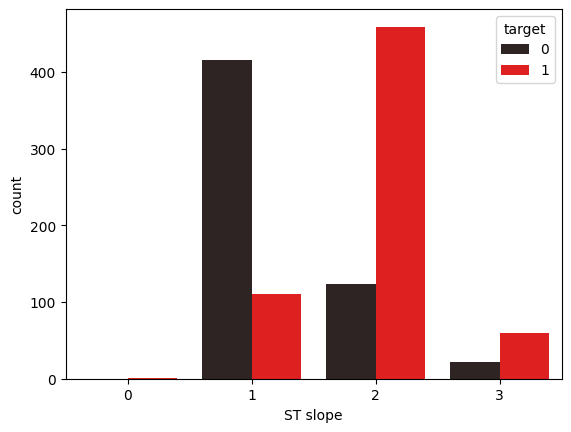

In [33]:
sns.countplot(data=df,x='ST slope',hue='target',color='red')

**The slope at which is 2('*flat*') and 3('*downwards*') can cause a chance of heart disease**

###Model development

####By using Random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
rfc=RandomForestClassifier(n_estimators=100)

In [36]:
X=df.drop('target',axis=1)
y=df['target']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
predictions=rfc.predict(X_test)

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       218
           1       0.91      0.94      0.93       258

    accuracy                           0.92       476
   macro avg       0.92      0.92      0.92       476
weighted avg       0.92      0.92      0.92       476



In [41]:
print(confusion_matrix(y_test,predictions))

[[195  23]
 [ 15 243]]


####By using Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions1=lr.predict(X_test)

In [46]:
print(classification_report(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       218
           1       0.85      0.87      0.86       258

    accuracy                           0.84       476
   macro avg       0.84      0.84      0.84       476
weighted avg       0.84      0.84      0.84       476

[[178  40]
 [ 34 224]]
